<a href="https://colab.research.google.com/github/HanlunAI/NextGenCurriculumDemonstration/blob/main/DemonstrationEpsilon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#5. The Story of the Central Limit Theorem

##5.1 From Bernoulli Trials to i.i.d. Random Variables

**5.1.1** From Bernoulli Trials to binomial distribution

A Bernoulli trial (or binomial trial) is a random experiment with exactly two possible outcomes, "success" and "failure", in which the probability of success is the same every time the experiment is conducted. [Papoulis, A. 1984] An example of a Bernoulli trial is tossing a coin with $p$ the probability of getting a head.

Another experiment by tossing the same coin $n$ times in a row would result in $n$  independent and identically distributed (*abbrv. as i.i.d.*) random variables, each of which has a probability $p$ of getting a head. Then the proportion of total heads is a binomial random variable. Distribution of such a random variable, denoted as $B(n,p)$.


**5.1.2** Resources from the web

Kyle Siegrist from University of Alabama in Huntsville constructed a nice ebsite devoted to probability, mathematical statistics: http://www.randomservices.org/random/. Please check out from there a web-application on an experiment on tossing coins: https://www.randomservices.org/random/apps/BinomialCoin.html. You may specific $n$ and $p$ for a simulation producing the empirical distribution. You may select "*Stop: never*" and click "*run*" to observe the asymptotic behaviour as *the sample size* increase.

**5.1.3** Starter codes

Proportion of success on $n$ Bernoulli trials, each with probability $p$ of success give rise to a binomial random variable $X \sim B(n,p)$. The *probability mass function (pmf)* over $0\leq i\leq n$ is related to binomial coefficients by 

$$P(X=i)=C^n_i p^i(1-p)^{n-i}$$

Cumulative sum over this pmf would give rise the *Cumulative Distribution Function (CDF)* of $X$. Let's play the the next code cell to see the pmf and CDF for different $n$ and $p$.

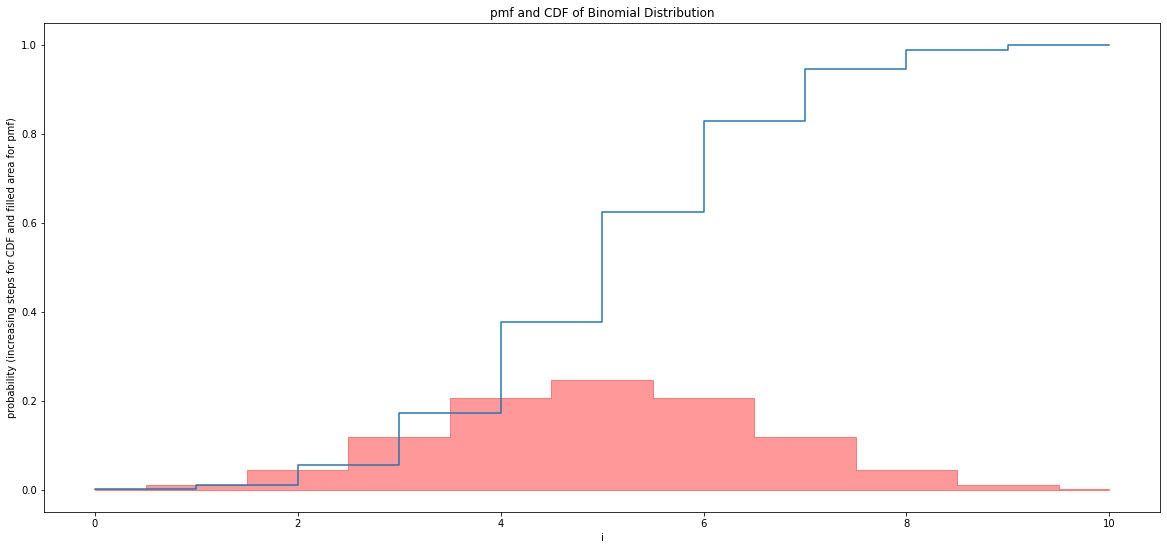

In [6]:
import numpy as np
import matplotlib.pyplot as plt

#@title Select values of n and p with the sliders and run the result
#the case when p = 0.5 means the coin is a fair coin
p = 0.5#@param{type:"slider", max:1, min:0, step:"0.0001"}
n = 10 #@param{type:"slider", min:5, max:30, step:1}

def binomial(p):
  count = 0
  layer = np.array([1])
  yield count, layer
  q = 1-p
  while True:
    count += 1
    first = np.append(layer*q, np.array([0]))
    second = np.append(np.array([0]), layer*p)
    layer = first + second
    yield count, layer

def bin(n, p):
  for count, pmf in binomial(p):
    if count == n:
      support = np.array(range(n+1))
      #first moment
      mean = np.dot(pmf, support)
      #second central moment
      varience = np.dot(pmf, (support-mean)**2)
      return mean, varience, pmf 

plt.rcParams["figure.figsize"] = (20,9)

plt.title("pmf and CDF of Binomial Distribution")
mean, varience, pmf = bin(n, p)
support = [i for i in range(n+1)]
plt.step(support, pmf.cumsum(), where='post')
plt.fill_between(support, pmf, step="mid", alpha=0.4, color = "red")
plt.ylabel("probability (increasing steps for CDF and filled area for pmf)")
plt.xlabel("i")
plt.show()

**5.1.4** Example: the Binomial Distribution comes up quite often. Recall our workstation with $n$ battaries running in parallel. After a period of wear and tear, assume each battery has an identitical chance of $p$ requiring, independent of other batteries. Then the proportion of batteries need replacement also follow the binomial distribution $B(n,p)$.

##5.2 Approximation of the Binomial Distribution

**5.2.1** Wow! Let's run this.

One may compute the mean and variance of $B(n,p)$ as $np$ and $np(1-p)$ respecitively. One way to do is to take advantage of the *additive property* of expectation. In the next code cell, we plot side by side CDFs of the Binomial Distribution and the Normal Distribution with the same mean and variance. Did you spot anything amazing as $n$ increase?

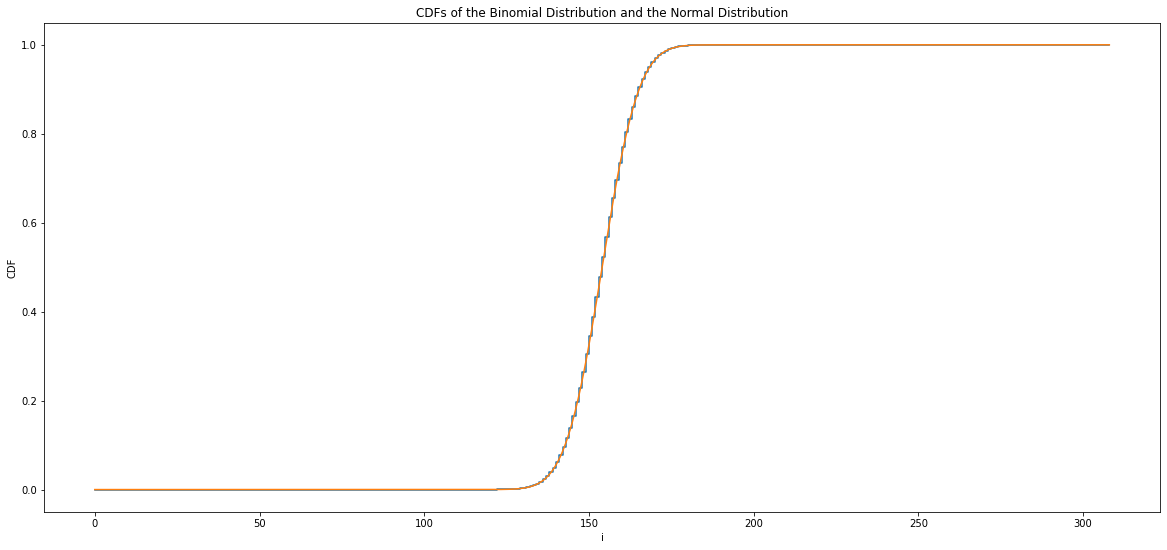

In [10]:
from scipy import special

#@title Select values of n and p with the sliders and run the result

p = 0.5#@param{type:"slider", max:1, min:0, step:"0.0001"}
n = 308#@param{type:"slider", max:1000, min:1, step:"1"}


plt.rcParams["figure.figsize"] = (20,9)
plt.title("CDFs of the Binomial Distribution and the Normal Distribution")
support = [i for i in range(n+1)]
mean, varience, pmf = bin(n, p)
plt.step(support, pmf.cumsum(), where='post')


x = np.linspace(0, n, 1000)
Lx = (x-mean)/np.sqrt(varience)
F = (special.erf(Lx/np.sqrt(2))+1)/2
plt.plot(x, F)
plt.ylabel("CDF")
plt.xlabel("i")
plt.show()

**5.2.2** The Story of the Central Limit Theorem~

Yes! The smooth CDF of the Normal Distribution passes through many steps of the CDF of the Binomial Distribution. As $n$ increase, the two almost coincide no matter what $p$ we start from. This suggests that the Normal Distribution is a good approximation of the Binomial Distribution. This could be viewed as a special case of the Central Limit Theorem.

Under a border scope, we may start from almost any random variable $Y$ (apart from the Bernoulli Trial as in 5.1.1). And the story of the *Central Limit Theorem* goes like this:
1. Almost surely, a bookkeeping of $Y$ can be given by its moments (a.k.a. the first moment, the second central moment, the third central moment, the forth central moment, ...)
2. **Keypoint:** The Normal Distribution is actually the class of distribution with the third central moment, the forth central moment and all high order central moments being $0$.
3. Given $n$ identitical and yet independent samples of $Y$. Let's sum up these samples and take the average, denoted as $\bar{Y_n}$.
4. Moments of $\bar{Y_n}$ can be computed accordingly by additive property of expectation. As the number $n$ grows, higher moments of $\bar{Y_n}$ approach $0$ really fast.
5. And so, for large $n$, one may approximate $\bar{Y_n}$ with a distribution having the same mean and variance, and all other central moments being zero. Naturally, such a approximation would be a normal distribution!

(Umm... this is just a story, not even a sketch of a proof... it will be helpful to learn some measure theory and some integral transforms if you want to work on a proof.)

##"What's Past is Prologue"

*Special thanks to all students joining the workshop.*

Hopefully, this workshop would mark beginning for some student's journey in python, colab and maybe also mathematics.

If you find this material helpful, please feel free to give us a star/ fork [our demonstration](https://github.com/HanlunAI/NextGenCurriculumDemonstration)

More information about us can be found [here](https://hanlunai.com/) :)

If you would like to collaborate on interesting data analytics projects, please feel free to write to us.